In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 5

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/22 [>.............................] - ETA: 5s - loss: 1.7221 - accuracy: 0.0938
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
22/22 [==============================] - 0s 5ms/step - loss: 1.5203 - accuracy: 0.2549 - val_loss: 1.3426 - val_accuracy: 0.3972
Epoch 2/1000
 1/22 [>.............................] - ETA: 0s - loss: 1.3834 - accuracy: 0.3203
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
22/22 [==============================] - 0s 2ms/step - loss: 1.3098 - accuracy: 0.3453 - val_loss: 1.1662 - val_accuracy: 0.5745
Epoch 3/1000
 1/22 [>.............................] - ETA: 0s - loss: 1.2522 - accuracy: 0.3047
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
22/22 [==============================] - 0s 2ms/step - loss: 1.1928 - accuracy: 0.4227 - val_loss: 1.0752 - val_accuracy: 0.5963
Epoch 4/1000
 1/22 [>.............................] - ETA: 0s - loss: 1.1655 - accuracy: 0.4297
E

/home/syed_mazhar/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
22/22 [==============================] - 0s 2ms/step - loss: 1.0394 - accuracy: 0.5327 - val_loss: 0.9302 - val_accuracy: 0.6561
Epoch 7/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.9707 - accuracy: 0.6016
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
22/22 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.5468 - val_loss: 0.8907 - val_accuracy: 0.6464
Epoch 8/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.9607 - accuracy: 0.5781
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
22/22 [==============================] - 0s 2ms/step - loss: 0.9729 - accuracy: 0.5712 - val_loss: 0.8498 - val_accuracy: 0.6594
Epoch 9/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.9028 - accuracy: 0.5703
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
22/22 [=============

In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 956us/step - loss: 0.1115 - accuracy: 0.9837


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 28ms/step
[1.7638875e-02 1.7651824e-02 9.6469724e-01 6.0304378e-06 6.0436223e-06]
2


# Confusion matrix

29/29 [==============================] - 0s 594us/step


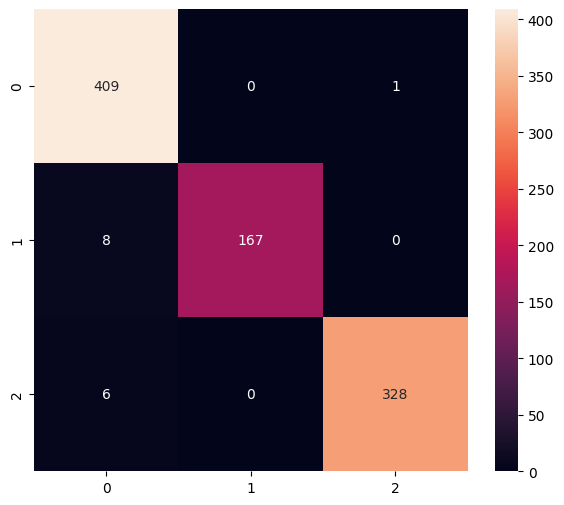

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       410
           1       1.00      0.95      0.98       175
           2       1.00      0.98      0.99       334

    accuracy                           0.98       919
   macro avg       0.99      0.98      0.98       919
weighted avg       0.98      0.98      0.98       919



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/home/syed_mazhar/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpc3q2abas/assets


INFO:tensorflow:Assets written to: /tmp/tmpc3q2abas/assets
2024-01-05 18:20:14.806104: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-01-05 18:20:14.806125: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-01-05 18:20:14.806290: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpc3q2abas
2024-01-05 18:20:14.806884: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-01-05 18:20:14.806895: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpc3q2abas
2024-01-05 18:20:14.808996: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-01-05 18:20:14.831413: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpc3q2abas
2024-01-05 18:20:14.838004: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

6616

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 35 µs, sys: 5 µs, total: 40 µs
Wall time: 43.6 µs


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.7638875e-02 1.7651824e-02 9.6469724e-01 6.0304378e-06 6.0436159e-06]
2
